# Manual Preprocessing

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion
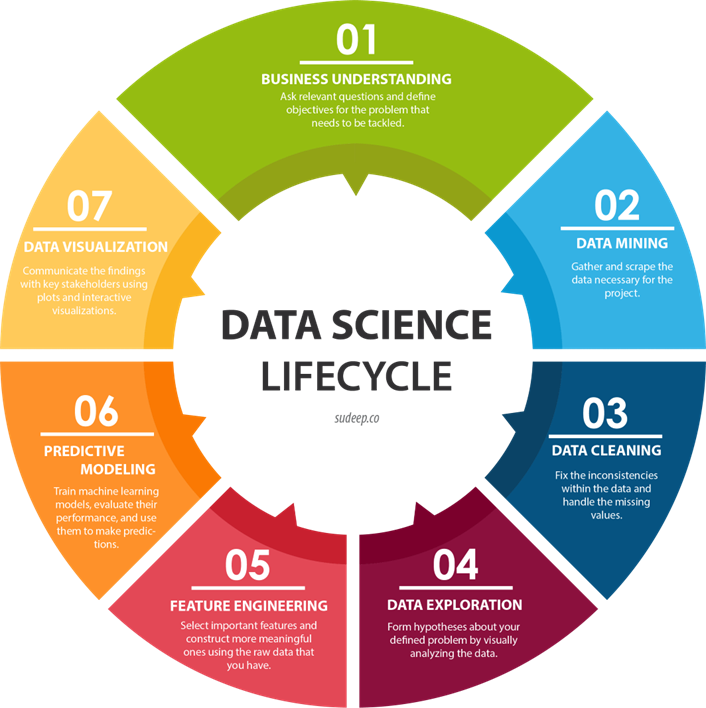

In [2]:
import pandas as pd

df = pd.read_csv("Cars93.csv", keep_default_na=False, na_values=["", "NA"])
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Step 2 - Perform basic data quality checks

In [3]:
df.shape

(94, 28)

In [4]:
df.duplicated().sum()

np.int64(1)

In [5]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [6]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [7]:
df[df["AirBags"].isna()]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
21,22,Chrysler,Imperial,Large,29.5,29.5,29.5,20,26,NaN,...,6,203,110,69,44,36.0,17.0,3570,USA,Chrysler Imperial
45,46,Hyundai,Scoupe,Sporty,9.1,10.0,11.0,26,34,NaN,...,4,166,94,64,34,23.5,9.0,2285,non-USA,Hyundai Scoupe
51,52,Lincoln,Town_Car,Large,34.4,36.1,37.8,18,26,NaN,...,6,219,117,77,45,31.5,22.0,4055,USA,Lincoln Town_Car


# As a data scientist you are trying to estimate weight of the car here

# Step 3 - Replace
1. categorical - mode
2. continuous - mean, median

In [8]:
df["AirBags"].mode()

0    Driver only
Name: AirBags, dtype: object

In [9]:
df["AirBags"].mode()[0]

'Driver only'

In [10]:
df["Luggage.room"].mean()

np.float64(13.890243902439025)

In [11]:
df["Luggage.room"].median()

np.float64(14.0)

In [12]:
mode = df["AirBags"].mode()[0]
print(mode)
df["AirBags"] = df["AirBags"].fillna(mode)

Driver only


In [13]:
df["AirBags"]

0                   None
1     Driver & Passenger
2            Driver only
3            Driver only
4            Driver only
             ...        
88                  None
89                  None
90                  None
91           Driver only
92    Driver & Passenger
Name: AirBags, Length: 93, dtype: object

In [14]:
cat = df.select_dtypes(include="object").columns.tolist()
print(cat)

['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']


In [15]:
num = df.select_dtypes(include="number").columns.tolist()
print(num)

['id', 'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']


In [16]:
def replacer(df):
    cat_cols = df.select_dtypes(include="object").columns.tolist()
    for i in df.columns:
        if i in cat_cols:
            mode = df[i].mode()[0]
            df[i] = df[i].fillna(mode)
        else:
            mean = df[i].mean()
            df[i] = df[i].fillna(mean)

In [17]:
replacer(df)

In [18]:
df.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

# Step 3 - Seperate X and Y

In [19]:
X = df.drop(columns = ["id", "Weight"])
Y = df["Weight"]

In [20]:
X.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Origin', 'Make'],
      dtype='object')

In [21]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [22]:
Y.head()

0    2705
1    3560
2    3375
3    3405
4    3640
Name: Weight, dtype: int64

# Seperate the categorical and continuous features

In [23]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [24]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [25]:
df[cat_cols].nunique() / len(df)

Manufacturer       0.344086
Model              1.000000
Type               0.064516
AirBags            0.032258
DriveTrain         0.032258
Cylinders          0.064516
Man.trans.avail    0.021505
Origin             0.021505
Make               1.000000
dtype: float64

In [26]:
X = df.drop(columns = ["Model", "Make"])

# Step 4 - Apply train test split

In [27]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
xtrain.shape

(74, 26)

In [29]:
xtest.shape

(19, 26)

In [30]:
ytrain.shape

(74,)

In [31]:
ytest.shape

(19,)

# Apply preprocessing

In [32]:
len(df)

93

In [33]:
df[cat_cols].nunique() / len(df)

Manufacturer       0.344086
Model              1.000000
Type               0.064516
AirBags            0.032258
DriveTrain         0.032258
Cylinders          0.064516
Man.trans.avail    0.021505
Origin             0.021505
Make               1.000000
dtype: float64

### Categorical features - Onehotencoding

In [34]:
xtrain_cat = xtrain.select_dtypes(include = "object")
xtrain_cat

,Manufacturer,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin
65,Nissan,Van,None,Front,6,No,non-USA
15,Chevrolet,Van,None,Front,6,No,USA
68,Oldsmobile,Midsize,Driver only,Front,4,No,USA
78,Saturn,Small,Driver only,Front,4,Yes,USA
30,Ford,Small,None,Front,4,Yes,USA
...,...,...,...,...,...,...,...
20,Chrysler,Compact,Driver & Passenger,Front,4,No,USA
60,Mercury,Midsize,None,Rear,6,No,USA
71,Plymouth,Sporty,None,4WD,4,Yes,USA
14,Chevrolet,Midsize,None,Front,4,No,USA


In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False, drop="first"
).set_output(transform="pandas")

ohe.fit(xtrain_cat)

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [36]:
xtrain_cat_pre = ohe.transform(xtrain_cat)
xtrain_cat_pre.head()

,Manufacturer_Audi,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,Manufacturer_Geo,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
xtest_cat = xtest.select_dtypes(include="object")
xtest_cat_pre = ohe.transform(xtest_cat)
xtest_cat_pre.head()

,Manufacturer_Audi,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,Manufacturer_Geo,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [38]:
xtrain_num = xtrain.select_dtypes(include="number").drop(columns=["id", "Weight"])
xtrain_num

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
65,16.7,19.1,21.5,17,23,3.0,151,4800,2065,20.0,7,190,112,74,41,27.0,13.890244
15,14.7,16.3,18.0,18,23,3.8,170,4800,1690,20.0,7,178,110,74,44,30.5,13.890244
68,14.2,16.3,18.4,23,31,2.2,110,5200,2565,16.5,5,190,105,70,42,28.0,16.000000
78,9.2,11.1,12.9,28,38,1.9,85,5000,2145,12.8,5,176,102,68,40,26.5,12.000000
30,6.9,7.4,7.9,31,33,1.3,63,5000,3150,10.0,4,141,90,63,33,26.0,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,14.5,15.8,17.1,23,28,3.0,141,5000,2090,16.0,6,183,104,68,41,30.5,14.000000
60,14.9,14.9,14.9,19,26,3.8,140,3800,1730,18.0,5,199,113,73,38,28.0,15.000000
71,11.4,14.4,17.4,23,30,1.8,92,5000,2360,15.9,4,173,97,67,39,24.5,8.000000
14,13.4,15.9,18.4,21,29,2.2,110,5200,2595,16.5,6,198,108,71,40,28.5,16.000000


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(xtrain_num)

,copy,True
,with_mean,True
,with_std,True


In [40]:
xtrain_num_pre =  scaler.transform(xtrain_num)
xtrain_num_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
65,-0.045290,-0.042952,-0.039482,-0.926566,-1.134441,0.307021,0.205378,-0.666653,-0.427741,1.004804,1.837167,0.389311,1.124609,1.126155,0.626076,-0.344587,-0.100671
15,-0.279660,-0.335700,-0.355094,-0.749850,-1.134441,1.093845,0.603669,-0.666653,-1.218799,1.004804,1.837167,-0.403598,0.834134,1.126155,1.571579,0.787575,-0.100671
68,-0.338253,-0.335700,-0.319024,0.133731,0.378147,-0.479803,-0.654093,0.006826,0.627002,-0.063961,-0.162103,0.389311,0.107947,0.116028,0.941244,-0.021112,0.639161
78,-0.924178,-0.879377,-0.814985,1.017312,1.701662,-0.774863,-1.178161,-0.329914,-0.258982,-1.193798,-0.162103,-0.535749,-0.327766,-0.389035,0.310909,-0.506324,-0.763526
30,-1.193703,-1.266224,-1.265859,1.547461,0.756294,-1.364981,-1.639341,-0.329914,1.861052,-2.048810,-1.161738,-2.848400,-2.070615,-1.651694,-1.895265,-0.668062,-0.763526


In [ ]:
xtest_num = xtest.select_dtypes(include="number").drop(columns=["id", "Weight"])
xtest_num_pre = scaler.transform(xtest_num)

In [45]:
xtest_num_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
40,-0.010135,0.030236,0.068728,0.310447,0.378147,-0.381450,0.394042,1.017044,1.238753,-0.247178,-1.161738,-0.601825,-0.618240,0.116028,-0.004259,-1.476749,-2.166213
22,-1.076518,-1.078028,-1.022387,1.194028,0.756294,-1.168275,-1.031422,1.353784,2.145833,-1.071653,-0.162103,-0.667901,-0.908715,-0.894099,-2.210433,-0.506324,-1.114198
55,-0.057009,-0.042952,-0.021447,-0.749850,-0.945368,0.307021,0.289229,-0.329914,-0.058581,0.882659,1.837167,0.389311,0.834134,0.621092,-0.004259,-0.182849,-0.100671
72,-1.041363,-1.098939,-1.085510,1.547461,2.268882,-1.069922,-1.408751,0.680305,1.818862,-1.071653,-1.161738,-0.469674,-0.763478,-0.894099,-1.264930,-0.829799,0.989833
0,-0.490593,-0.377522,-0.282954,0.487164,0.378147,-0.873216,-0.025212,1.858893,1.312585,-1.071653,-0.162103,-0.469674,-0.327766,-0.389035,-0.634594,-0.506324,-1.114198


# Combine both columns

In [46]:
xtrain_pre = xtrain_num_pre.join(xtrain_cat_pre)
xtrain_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
65,-0.045290,-0.042952,-0.039482,-0.926566,-1.134441,0.307021,0.205378,-0.666653,-0.427741,1.004804,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15,-0.279660,-0.335700,-0.355094,-0.749850,-1.134441,1.093845,0.603669,-0.666653,-1.218799,1.004804,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,-0.338253,-0.335700,-0.319024,0.133731,0.378147,-0.479803,-0.654093,0.006826,0.627002,-0.063961,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
78,-0.924178,-0.879377,-0.814985,1.017312,1.701662,-0.774863,-1.178161,-0.329914,-0.258982,-1.193798,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30,-1.193703,-1.266224,-1.265859,1.547461,0.756294,-1.364981,-1.639341,-0.329914,1.861052,-2.048810,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
xtest_pre = xtest_num_pre.join(xtest_cat_pre)
xtest_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
40,-0.010135,0.030236,0.068728,0.310447,0.378147,-0.381450,0.394042,1.017044,1.238753,-0.247178,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
22,-1.076518,-1.078028,-1.022387,1.194028,0.756294,-1.168275,-1.031422,1.353784,2.145833,-1.071653,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
55,-0.057009,-0.042952,-0.021447,-0.749850,-0.945368,0.307021,0.289229,-0.329914,-0.058581,0.882659,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
72,-1.041363,-1.098939,-1.085510,1.547461,2.268882,-1.069922,-1.408751,0.680305,1.818862,-1.071653,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,-0.490593,-0.377522,-0.282954,0.487164,0.378147,-0.873216,-0.025212,1.858893,1.312585,-1.071653,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


# Model Building

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain_pre, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
model.intercept_

np.float64(3405.2817905195657)

In [50]:
model.coef_

array([ 1451.98593536, -2907.19838271,  1762.03881282,  -224.51313847,
         -32.88694122,   -31.21156302,   221.61570431,   -95.15238653,
         -45.01364027,  -145.81534813,   109.31669442,   -11.46791352,
          83.76378683,   201.14314408,   -14.69248882,   -57.27489071,
          70.55873   ,   -22.32984663,  -150.78674523,  -421.62553168,
          40.7142687 ,   394.90719852,   105.51916383,    29.91341113,
         134.33140622,   -49.24084954,   526.56950633,   534.75141963,
         218.15571189,  -385.77357541,    88.04916735,  -282.77543861,
          12.08302666,  -783.7464714 ,    -4.34194821,    -4.40759825,
         155.22267216,   -69.28961866,   263.44057463,   -15.39711597,
        -299.50474669,   -36.78835142,    32.21761144,   391.6748307 ,
         188.25156458,   121.11354468,  -185.48799686,  -306.63657691,
        -177.83896961,    49.94136466,  -115.97415566,  -102.5654302 ,
         204.1889185 ,   191.82187309,   -87.41897318,    48.02542955,
      

In [51]:
xtrain_pre.columns

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Manufacturer_Audi',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrylser', 'Manufacturer_Chrysler', 'Manufacturer_Dodge',
       'Manufacturer_Eagle', 'Manufacturer_Ford', 'Manufacturer_Geo',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Lexus', 'Manufacturer_Lincoln', 'Manufacturer_Mazda',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Saab', 'Manufacturer_Saturn',
       'Manufacturer_Subaru', 'Manufacturer_Suzuki', 'Manufacturer_Toyota',
       'Man

# Model Evaluate

In [52]:
model.score(xtrain_pre, ytrain)

0.9962358571591687

In [53]:
model.score(xtest_pre, ytest)

0.8210643566752944

In [54]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae =  mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [56]:
evaluate_model(model, xtrain_pre, ytrain)

RMSE : 36.08
MAE : 25.50
MAPE : 0.82%
R2 : 99.62%


In [57]:
evaluate_model(model, xtest_pre, ytest)

RMSE : 243.07
MAE : 194.30
MAPE : 6.59%
R2 : 82.11%


# Save the model

In [58]:
import joblib

joblib.dump(model, "model.joblib")

['model.joblib']

In [59]:
joblib.dump(ohe, "ohe.joblib")

['ohe.joblib']

In [64]:
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

# Load the model object

In [61]:
m = joblib.load("model.joblib")
m

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
o = joblib.load("ohe.joblib")
o

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [65]:
s = joblib.load("scaler.joblib")
s

,copy,True
,with_mean,True
,with_std,True
